Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## Objetivos del estudio ##

El presente proyecto tiene como objetivo estudiar el comportamiento de conversión de clientes de una tienda en línea internacional por medio de 2 grupos de control A y B, y confirmar si los cambios realizados entre estos dos grupos tuvieron una mejora tanto en las vistas de las páginas del producto, el agregar artículos al carrito de compras, y compras realizadas. 

Podremos confirmar que hubo un aumento de estas conversiones si hubo un aumento del 10% para los usuarios que estén en la prueba de recommender_system_test.



In [37]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st

events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
new_users_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

print(new_users)

                user_id  first_date     region   device
0      D72A72121175D8BE  2020-12-07         EU       PC
1      F1C668619DFE6E65  2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F  2020-12-07         EU       PC
3      50734A22C0C63768  2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
...                 ...         ...        ...      ...
58698  1DB53B933257165D  2020-12-20         EU  Android
58699  538643EB4527ED03  2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD  2020-12-20         EU       PC
58701  1C7D23927835213F  2020-12-20         EU   iPhone
58702  8F04273BB2860229  2020-12-20         EU  Android

[58703 rows x 4 columns]


En este apartado, hacemos la lectura de los datos y ver cómo podemos optimizar la base de datos para tener toda la información en un solo Dataframe. En este caso, sabemos que tenemos que hacer el análisis de la prueba 'recommender_system_test' de la región de UE, por lo que lo ideal será fusionar en un solo dataframe los usuarios de esta prueba junto con el dataframe de los eventos por usuario utilizando la función merge().

In [2]:

# Fusión de dataframes de particpantes de las pruebas y usuarios nuevos
pre_merged_participants = participants.merge(new_users, on = 'user_id') 

# Filtrado de usuarios en la prueba recommender_system_test
only_recommender = pre_merged_participants[pre_merged_participants['ab_test'] == 'recommender_system_test']

# Filtrado de las pruebas de usuarios de la region de EU
only_eu = only_recommender[only_recommender['region'] == 'EU']

# Fusion para asignar a cada evento el grupo correspondiente y su prueba ab
clean_merge = only_eu.merge(new_users_events, on = 'user_id')
print(clean_merge)

# Comprobación de que no haya usuarios en ambos grupos
temp_group = clean_merge.groupby('user_id').agg({'group' : 'nunique'})
print(temp_group[temp_group['group'] == 2])


                user_id group                  ab_test  first_date region  \
0      D1ABA3E2887B6A73     A  recommender_system_test  2020-12-07     EU   
1      D1ABA3E2887B6A73     A  recommender_system_test  2020-12-07     EU   
2      D1ABA3E2887B6A73     A  recommender_system_test  2020-12-07     EU   
3      D1ABA3E2887B6A73     A  recommender_system_test  2020-12-07     EU   
4      A7A3664BD6242119     A  recommender_system_test  2020-12-20     EU   
...                 ...   ...                      ...         ...    ...   
22669  80712ED4EA1B52A5     A  recommender_system_test  2020-12-14     EU   
22670  80712ED4EA1B52A5     A  recommender_system_test  2020-12-14     EU   
22671  80712ED4EA1B52A5     A  recommender_system_test  2020-12-14     EU   
22672  80712ED4EA1B52A5     A  recommender_system_test  2020-12-14     EU   
22673  80712ED4EA1B52A5     A  recommender_system_test  2020-12-14     EU   

        device             event_dt    event_name  details  
0           PC

Para esta sección, se realizó la fusión de los dataframes de los usuarios nuevos de la región de EU con los eventos, así como se obtuvo un nuevo dataframe con solo los usuarios que estaban dentro de la prueba 'recommender_system_test' para no tener información de otras pruebas. Se realizó una comprobación de que los usuarios estuvieran asignados a un solo grupo por medio de la función 'groupby' y 'nunique'. Al arrojar que todos los usuarios solo pertenecen a un solo grupo, podremos proseguir a la conversión de datos con un número más reducido y mejor filtrado de los datos para hacer el análisis más eficaz. 

Hay que recalcar que los datos pueden no ser suficientes de acuerdo a los requisitos al inicio de la prueba, ya que se esperaba la participación de 6,000 usuarios y que estos fueran el 15% de los nuevos usuarios de la región de UE, así como también debían de ser de la prueba 'recommender_system_test', por lo que no se hará en este caso la selección del 15% de la audiencia de EU para llegar lo más cercano posible a los 6,000 participantes.

In [3]:

# Se convierten datos de la columna 'event_dt' y 'first_date' a datetime
clean_merge['event_dt'] = pd.to_datetime(clean_merge['event_dt'])
clean_merge['first_date'] = pd.to_datetime(clean_merge['first_date'])

# Se remplazan los valores ausentes por el número 1 para que sean del mismo tipo que los valores de la columna
clean_merge['details'].fillna(1, inplace = True)

print(clean_merge.info())
print(clean_merge.sort_values(by = 'event_dt'))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22674 entries, 0 to 22673
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     22674 non-null  object        
 1   group       22674 non-null  object        
 2   ab_test     22674 non-null  object        
 3   first_date  22674 non-null  datetime64[ns]
 4   region      22674 non-null  object        
 5   device      22674 non-null  object        
 6   event_dt    22674 non-null  datetime64[ns]
 7   event_name  22674 non-null  object        
 8   details     22674 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.7+ MB
None
                user_id group                  ab_test first_date region  \
11421  894A2506B3A50D03     B  recommender_system_test 2020-12-07     EU   
11418  894A2506B3A50D03     B  recommender_system_test 2020-12-07     EU   
19841  8FC9D1BB3017BE66     B  recommender_system_test 2020-

Se convirtieron los datos de la columna de 'event_dt' y 'first_date' a tipo datetime para ir preparando los análisis más adelante. En cuanto a los datos ausentes, se procedió a llenar las celdas con datos o valores del mismo tipo que los que ya hay en la columna, en este caso sería valores tipo 'float' y se les asignó el valor de 1, ya que cada ingreso a la página cuenta como 1, así como cada evento de ingreso de productos al carrito.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

### Estudio de la conversión en las diferentes etapas del embudo ###

In [4]:
#pageByUsersA = clean_merge[(clean_merge['group'] == 'A') & (clean_merge['event_name'] == 'product_page')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#pageByUsersA.columns = ['user_id', 'product_page']

#pageByUsersB = clean_merge[(clean_merge['group'] == 'B') & (clean_merge['event_name'] == 'product_page')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#pageByUsersB.columns = ['user_id', 'product_page']

grouped_pageByUsers = clean_merge[clean_merge['event_name'] == 'product_page'].groupby(['user_id', 'group'], as_index = False).agg({'event_name' : 'count'})
avg_pageByUsers = grouped_pageByUsers.groupby('group', as_index = False).agg({'event_name' : 'mean'})
avg_pageByUsers.columns = ['group', 'avg_page_products']


#cartByUsersA = clean_merge[(clean_merge['group'] == 'A') & (clean_merge['event_name'] == 'product_cart')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#cartByUsersA.columns = ['user_id', 'product_cart']

#cartByUsersB = clean_merge[(clean_merge['group'] == 'B') & (clean_merge['event_name'] == 'product_cart')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#cartByUsersB.columns = ['user_id', 'product_cart']

grouped_cartByUsers = clean_merge[clean_merge['event_name'] == 'product_cart'].groupby(['user_id', 'group'], as_index = False).agg({'event_name' : 'count'})
avg_cartByUsers = grouped_cartByUsers.groupby('group', as_index = False).agg({'event_name' : 'mean'})
avg_cartByUsers.columns = ['group', 'avg_product_cart']




#purchaseByUsersA = clean_merge[(clean_merge['group'] == 'A') & (clean_merge['event_name'] == 'purchase')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#purchaseByUsersA.columns = ['user_id', 'purchases']

#purchaseByUsersB = clean_merge[(clean_merge['group'] == 'B') & (clean_merge['event_name'] == 'purchase')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
#purchaseByUsersB.columns = ['user_id', 'purchases']



grouped_purchasesByUsers = clean_merge[clean_merge['event_name'] == 'purchase'].groupby(['user_id', 'group'], as_index = False).agg({'event_name' : 'count'})
avg_purchasesByUsers = grouped_purchasesByUsers.groupby('group', as_index = False).agg({'event_name' : 'mean'})
avg_purchasesByUsers.columns = ['group', 'avg_purchases']


total_purchasesByGroup = clean_merge[clean_merge['event_name'] == 'purchase'].groupby(['group'], as_index = False).agg({'details' : 'mean'})

total_purchasesByGroup.columns = ['group', 'avg_spent']
#print(pageByUsersA)
#print(pageByUsersA['product_page'].mean())
#print(pageByUsersB)
#print(pageByUsersB['product_page'].mean())
print('Promedio de visitas a la página del producto por grupo')
print(avg_pageByUsers)
print('--------------------------------')

#print(cartByUsersA)
#print(cartByUsersA['product_cart'].mean())
#print(cartByUsersB)
#print(cartByUsersB['product_cart'].mean())
print('Promedio de visitas a la página de agregar al carrito por grupo')
print(avg_cartByUsers)
print('--------------------------------')

#print(purchaseByUsersA)
#print(purchaseByUsersA['purchases'].mean())
#print(purchaseByUsersB)
#print(purchaseByUsersB['purchases'].mean())
print('Promedio de número de compras por grupo')
print(avg_purchasesByUsers)
print('--------------------------------')
print('Promedio de gasto en compras por grupo ')
print(total_purchasesByGroup)

total_users_by_group = clean_merge.groupby('group', as_index = False).agg({'user_id': 'nunique'})
print(total_users_by_group)
#print(clean_merge[clean_merge['group'] == 'B'].groupby(['user_id']).count())

Promedio de visitas a la página del producto por grupo
  group  avg_page_products
0     A           2.992878
1     B           2.630832
--------------------------------
Promedio de visitas a la página de agregar al carrito por grupo
  group  avg_product_cart
0     A          3.006394
1     B          2.635246
--------------------------------
Promedio de número de compras por grupo
  group  avg_purchases
0     A       2.917167
1     B       2.606426
--------------------------------
Promedio de gasto en compras por grupo 
  group  avg_spent
0     A  22.800700
1     B  22.362881
  group  user_id
0     A     2604
1     B      877


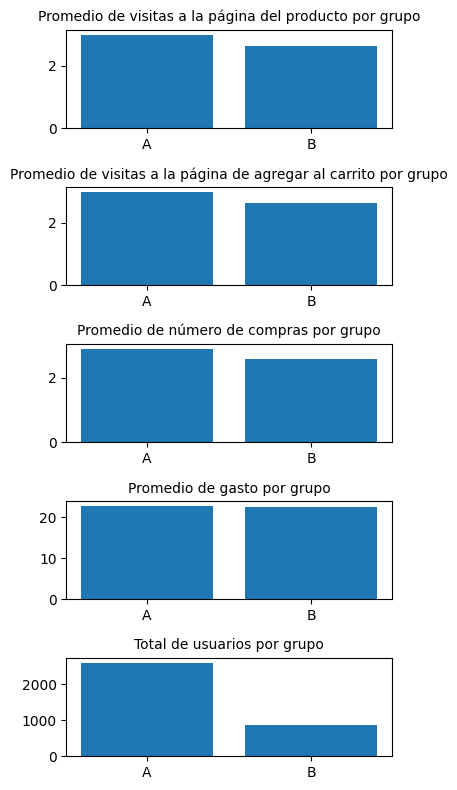

In [5]:
fig, axs = plt.subplots(5, 1, figsize = (4,8))
axs[0].bar(avg_pageByUsers['group'], avg_pageByUsers['avg_page_products'] )
axs[0].set_title('Promedio de visitas a la página del producto por grupo', fontsize=10)

axs[1].bar(avg_cartByUsers['group'], avg_cartByUsers['avg_product_cart'] )
axs[1].set_title('Promedio de visitas a la página de agregar al carrito por grupo', fontsize=10)

axs[2].bar(avg_purchasesByUsers['group'], avg_purchasesByUsers['avg_purchases'] )
axs[2].set_title('Promedio de número de compras por grupo', fontsize=10)

axs[3].bar(total_purchasesByGroup['group'], total_purchasesByGroup['avg_spent'] )
axs[3].set_title('Promedio de gasto por grupo', fontsize=10)

axs[4].bar(total_users_by_group['group'], total_users_by_group['user_id'] )
axs[4].set_title('Total de usuarios por grupo', fontsize=10)

plt.tight_layout()

Con los datos proporcionados de los usuarios que pertenecían a los grupos de prueba, vemos que para el grupo B hubo muy pocos usuarios para la prueba, 877 en comparación con el grupo A que tenía 2604 usuarios. A su vez, se obtuvo un promedio menor de conversiones en todas las etapas del embudo para los del grupo B. Se realizón por medio del promedio debido a la cantidad menor de usuarios para analizar en el grupo B. 

En los ejercicios anteriores se pudo confirmar que no hay usuarios que pertenezcan a ambos grupos, por lo que no hay un sesgo o información errónea en cuanto a la tendencia de los promedios. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo de las conversiones! Al tratarse de una prueba AB el mostrar la gráfica con los resultados por grupo aporta mucho a comprender las diferencias de manera visual
</div>

In [6]:
# Conversión de las fechas para eliminar los apartados de la hora, minutos y segundos
clean_merge['event_dt'] = clean_merge['event_dt'].dt.date


In [7]:
print(clean_merge)

                user_id group                  ab_test first_date region  \
0      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
1      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
2      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
3      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
4      A7A3664BD6242119     A  recommender_system_test 2020-12-20     EU   
...                 ...   ...                      ...        ...    ...   
22669  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22670  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22671  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22672  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22673  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   

        device    event_dt    event_name  details  
0           PC  2020-12-07      pur

      event_dt  user_id  group  ab_test  first_date  region  device  \
0   2020-12-07      674    674      674         674     674     674   
1   2020-12-08      551    551      551         551     551     551   
2   2020-12-09      709    709      709         709     709     709   
3   2020-12-10      580    580      580         580     580     580   
4   2020-12-11      517    517      517         517     517     517   
5   2020-12-12      545    545      545         545     545     545   
6   2020-12-13      472    472      472         472     472     472   
7   2020-12-14     1263   1263     1263        1263    1263    1263   
8   2020-12-15     1252   1252     1252        1252    1252    1252   
9   2020-12-16     1376   1376     1376        1376    1376    1376   
10  2020-12-17     1481   1481     1481        1481    1481    1481   
11  2020-12-18     1503   1503     1503        1503    1503    1503   
12  2020-12-19     1718   1718     1718        1718    1718    1718   
13  20

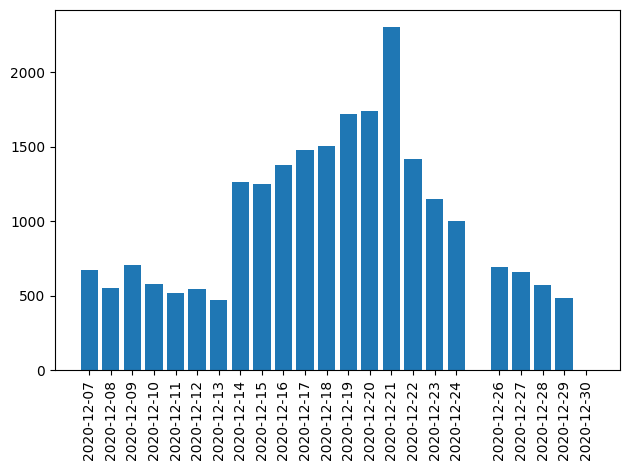

In [8]:
events_by_date = clean_merge.groupby('event_dt', as_index = False).count()
print(events_by_date)
plt.bar(events_by_date['event_dt'], events_by_date['event_name'])
plt.xticks([i for i in events_by_date['event_dt']], rotation = 90)
plt.tight_layout()

Observamos que la cantidad de eventos en la tienda en línea tuvo un repunte de actividades significativas el día 14 de diciembre y una baja de la misma mientras más se acercaba la fecha de navidad, el 25 de diciembre. Estos datos no coinciden con el supuesto de que habría un repunte de actividades 14 días después de la inscripción a la tienda, ya que esa tendencia debería de iniciar aproximadamente después del día 21 de diciembre. Estas observaciones parecen obedecer más a una alza en las compras debido a la cercanía de las fechas de navidad y están comprando regalos.

Para iniciar la prueba A/B, debemos considerar que se estarán introduciendo datos que no concuerdan en la cantidad de usuarios, por lo que se deberá de tomar probablemente otras medidas estadísticas para comprobar los resultados. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con esta gráfica se puede identificar la tendencia en la cantidad de eventos realizados a lo largo del tiempo. Cómo recomendación adicional, cuando se trate de analizar datos por fechas es mejor realizarlo en un gráfico de líneas, el gráfico de barras se utiliza cuando tienes pocos puntos en el eje horizontal para compararlos entre sí
</div>

## Evaluación de los resultados de la prueba A/B ##

### Evaluación de las conversiones de visita y compra ###

In [9]:
# Cantidad de ingresos a la página principal por usuario del grupo A y B
logins_per_userA = (clean_merge[(clean_merge['group'] == 'A') & (clean_merge['event_name'] == 'login')].groupby('user_id').agg({'event_name' : 'count'}))
logins_per_userB = (clean_merge[(clean_merge['group'] == 'B') & (clean_merge['event_name'] == 'login')].groupby('user_id').agg({'event_name' : 'count'}))

# Cantidad de compras por usuario del grupo A
purchaseByUsersA = clean_merge[(clean_merge['group'] == 'A') & (clean_merge['event_name'] == 'purchase')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
purchaseByUsersA.columns = ['user_id', 'purchases']

# Cantidad de compras por usuario del grupo B
purchaseByUsersB = clean_merge[(clean_merge['group'] == 'B') & (clean_merge['event_name'] == 'purchase')].groupby('user_id', as_index = False).agg({'event_name': 'count'})
purchaseByUsersB.columns = ['user_id', 'purchases']


sampleA =pd.concat([purchaseByUsersA['purchases'], pd.Series(0, index = np.arange(logins_per_userA['event_name'].sum() - len(purchaseByUsersA['purchases'])), name = 'purchasesA')], axis = 0)
sampleB =pd.concat([purchaseByUsersB['purchases'], pd.Series(0, index = np.arange(logins_per_userB['event_name'].sum() - len(purchaseByUsersB['purchases'])), name = 'purchasesB')], axis = 0)
#print(sampleA)
#print(sampleB)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.49974
-0.132


La prueba Man Whitney nos arroja un valor p de .49974, lo que es mayor que el valor alpha que típicamente usamos para considerar que dos muestras son iguales, el cual establecemos en .05 normalmente. En este caso, al ser mayor nuestro valor p que alpha, asumimos que no hay diferencia significativa en las conversiones de los visitantes del grupo A y el grupo B en las compras, por lo que no podemos rechazar la hipótesis nula de que son estadísticamente iguales.

Sin embargo, como hemos podido inutir en el análisis exploratorio de datos anterior, los usuarios del grupo B han tenido menores conversión comparados con los del grupo A. En este caso, el grupo B ha tenido 13.2% menos conversiones que el grupo A.

In [10]:
print(clean_merge)

                user_id group                  ab_test first_date region  \
0      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
1      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
2      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
3      D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU   
4      A7A3664BD6242119     A  recommender_system_test 2020-12-20     EU   
...                 ...   ...                      ...        ...    ...   
22669  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22670  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22671  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22672  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   
22673  80712ED4EA1B52A5     A  recommender_system_test 2020-12-14     EU   

        device    event_dt    event_name  details  
0           PC  2020-12-07      pur

### Evaluación de los promedios de compra ###

In [11]:
total_purchases = clean_merge[(clean_merge['event_name'] == 'purchase') ]
total_purchasesA = clean_merge[(clean_merge['event_name'] == 'purchase') & (clean_merge['group'] == 'A')]
total_purchasesB = clean_merge[(clean_merge['event_name'] == 'purchase') & (clean_merge['group'] == 'B')]

print('{0:.3f}'.format(stats.mannwhitneyu(total_purchasesA['details'], total_purchasesB['details'])[1]))
print('{0:.3f}'.format(total_purchasesB['details'].mean()/total_purchasesA['details'].mean()-1))


0.716
-0.019


Al igual que en el ejercicio anterior, tenemos un valor p mayor al .05, por lo que no podemos rechazar la hipótesis nula y así podemos afirmar que no hay diferencia significativa entre el monto total gastado por los usuarios en los dos grupos, pero el grupo B sigue teniendo menores compras que los del grupo A. La tendencia está mostrando que los cambios realizados no han sido favorables para aumentar las tasas de conversión.

### Declaración de valores atípicos ### 

In [12]:

print('Percentiles total compra:', np.percentile(clean_merge[clean_merge['event_name'] == 'purchase']['details'], [90, 95, 99]))
print('Percentiles numeros de compras:', np.percentile(clean_merge[clean_merge['event_name'] == 'purchase'].groupby('user_id', as_index = False).agg({'event_name' : 'count'})['event_name'], [90, 95, 99]))



Percentiles total compra: [ 99.99  99.99 499.99]
Percentiles numeros de compras: [4. 5. 6.]


Estableceremos como compras atípicas valores arriba de 5 productos y compras de valores arriba de 300 USD.

### Evaluación usando datos sin valores atípicos ###

In [13]:
usersWithManyPurchases = pd.concat([purchaseByUsersA[purchaseByUsersA['purchases'] > 5]['user_id'], purchaseByUsersB[purchaseByUsersB['purchases'] > 5]['user_id']], axis = 0)
usersWithExpensivePurchase = clean_merge[(clean_merge['details'] > 300) & (clean_merge['event_name'] == 'purchase') ]['user_id']
abnormalUsers = pd.concat([usersWithManyPurchases, usersWithExpensivePurchase], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([purchaseByUsersA[np.logical_not(purchaseByUsersA['user_id'].isin(abnormalUsers))]['purchases'],pd.Series(0, index=np.arange(logins_per_userA['event_name'].sum() - len(purchaseByUsersA['purchases'])),name='purchasesA')],axis=0)

sampleBFiltered = pd.concat([purchaseByUsersB[np.logical_not(purchaseByUsersB['user_id'].isin(abnormalUsers))]['purchases'],pd.Series(0, index=np.arange(logins_per_userB['event_name'].sum() - len(purchaseByUsersB['purchases'])),name='purchasesB')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.434
-0.161


Observamos que modificando las muestras y quitando los usuarios con comportamientos de compra atípicos, no hubo cambios en los resultados, seguimos sin rechazar la hipótesis nula ya que el valor p es de .435, arriba de .05, para afirmar que no hay diferencia significativa en las muestras, y seguimos teniendo menos conversión en el grupo B en comparación con el grupo A.

In [14]:

print("{0:.3f}".format(stats.mannwhitneyu(total_purchases[np.logical_and(total_purchases['group']=='A', np.logical_not(total_purchases['user_id'].isin(abnormalUsers)))]['details'], total_purchases[np.logical_and(total_purchases['group']=='B',  np.logical_not(total_purchases['user_id'].isin(abnormalUsers)))]['details'])[1]))
print("{0:.3f}".format(total_purchases[np.logical_and(total_purchases['group']=='B', np.logical_not(total_purchases['user_id'].isin(abnormalUsers)))]['details'].mean() / total_purchases[np.logical_and(total_purchases['group']=='A', np.logical_not(total_purchases['user_id'].isin(abnormalUsers)))]['details'].mean() - 1)) 

0.873
-0.046


Para finalizar las pruebas de Man Whitney, obtuvimos que aún eliminando los usuarios con compras atípicas, no hubo cambios con las pruebas anteriores respecto a la cantidad de dinero gastado por usuario y la tendencia siguió igual en decremento de las compras del grupo B en comparación con el grupo A. 

### Prueba Z para comprobar la diferencia estadística entre las proporciones ###

In [40]:
groupAUsers = clean_merge[clean_merge['group'] == 'A']
groupBUsers = clean_merge[clean_merge['group'] == 'B']

tempA = groupAUsers.groupby('event_name').count()
loginsA = tempA.iloc[0,0]
purchasesA = tempA.iloc[3,0]

tempB = groupBUsers.groupby('event_name').count()
loginsB = tempB.iloc[0,0]
purchasesB = tempB.iloc[3,0]

alpha = .05

p1 = purchasesA/loginsA
p2 = purchasesB/loginsB

p_combined = (purchasesA + purchasesB) / (loginsA + loginsB)

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/loginsA + 1/loginsB))

distr = st.norm(0, 1) 
# escribe tu código aquí

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):# escribe tu código aquí
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.00012198961229881178
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


Tal como intuimos en la sección del análisis exploratorio de los datos, observamos que hay un diferencia significativa entre las proporciones de los datos del grupo A y del grupo B, por lo que se podría requerir una mayor cantidad de tiempo para seguir reuniendo datos del grupo B.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, aplicar pruebas estadísticas sobre la conversión de cada evento ayuda a entender mejor en que etápa se ve más alterada la experiencia de los usuarios
</div>

## CONCLUSIONES ##

Como pudimos ver en el Análisis Exploratorio de los Datos, hubo una falta de datos de los predecesor para poder nutrir con más información la base de datos para la prueba. Sin embargo, tanto en el Análisis de los datos y en la Prueba A/B con la información proporcionada, se veía una tendencia y comprobación de que no hubo una mejora en las tasas de conversiones del grupo B con respecto al grupo A. Tal vez esta fue la razón por la que el personal anterior dejó inconclusa la prueba por la tendencia que se veía, por lo que se sugiere realizar algunos cambios en la tienda en línea y generar otra prueba A/B con una nueva base de datos de después de implementar los cambios a la página.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo Alejandro, redactaste buenas conclusiones. Se nota tu conocimiento para realizar los análisis a partir de pruebas AB, esto será algo que encuentres muy seguido en un entorno laboral.
    
Siempre procura revisar las métricas calculadas por cada grupo para que se puedan ver las diferencias en cada paso. El objetivo en un AB Test siempre es entender el comportamiento de los dos grupos para ver que grupo tiene un mejor desempeño en cuanto a las métricas que le conviene a la empresa
    
Saludos.
</div>